In [1]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#Jupyter magic to notify when a cell finishes execution with %%notify command -- does not work with Jupyterlab
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

###
import sys
sys.path.insert(0,'../src/')

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import IPython.display as ipd

### Mean vs Variance Experiment

In [11]:
mean_var_exp = pd.DataFrame(columns = ["mean", "var", "method", "acc", "sp"])
idx=0

with open("../experiments/mean-var.txt", "r") as handle:
    data = handle.readlines()
for i, line in enumerate(data):
    if "Mean" in line:
        mean = float(line.split()[1].replace(",",""))
        var = float(line.split()[3].replace(",",""))
        sws = (float(data[i+1].split()[11].replace(",","")), float(data[i+1].split()[14].replace(",","")))
        kd = (float(data[i+2].split()[11].replace(",","")), float(data[i+2].split()[14].replace(",","")))
        kd_s = (float(data[i+3].split()[11].replace(",","")), float(data[i+3].split()[14].replace(",","")))
        
        var = np.round(var*100.0)/100.0
        mean = np.round(mean*100.0)/100.0
        
        mean_var_exp.loc[idx] = ([mean, var, "SWS", sws[0], sws[1]])
        idx +=1
        mean_var_exp.loc[idx] = ([mean, var, "SWS + KD", kd[0], kd[1]])
        idx +=1
        mean_var_exp.loc[idx] = ([mean, var, "SWS + KD + Scaling", kd_s[0], kd_s[1]])
        idx +=1
        
mean_var_exp = mean_var_exp.drop_duplicates()

**Mean vs Var Heatmaps**

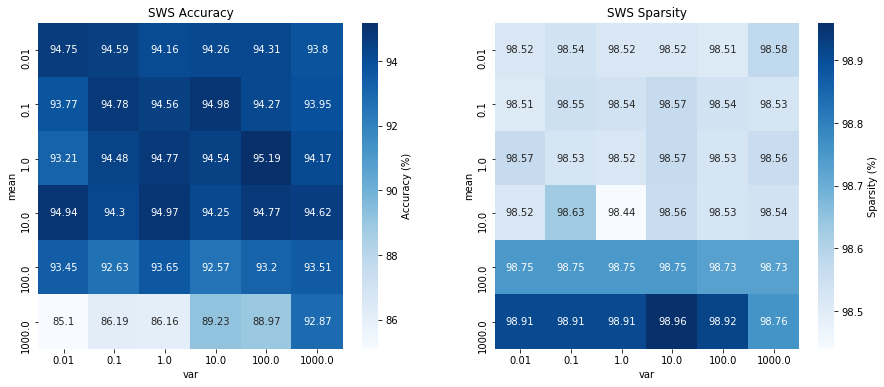

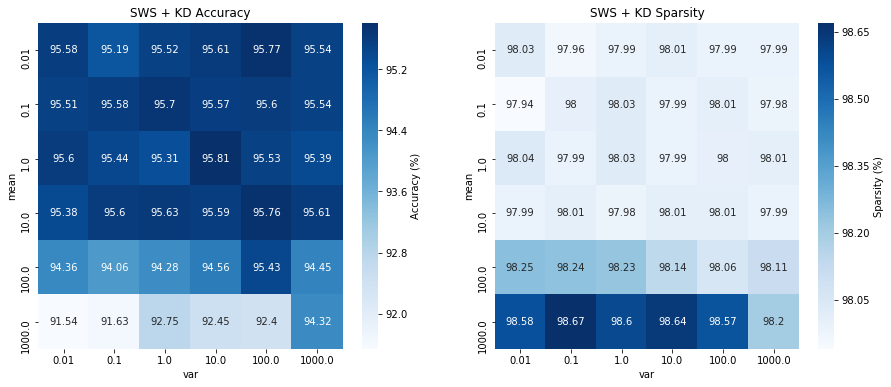

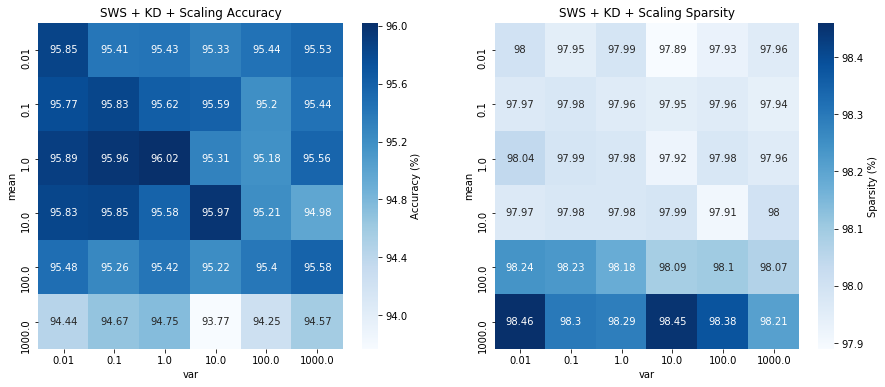

In [12]:
ipd.display(ipd.Markdown("**Mean vs Var Heatmaps**"))
plt.clf()
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.heatmap(mean_var_exp[mean_var_exp['method'] == "SWS"].pivot(index='mean', columns='var', values='acc'), cmap='Blues', cbar_kws = {'label' : 'Accuracy (%)'}, annot=True, fmt="g")
plt.title("SWS Accuracy")

plt.subplot(1,2,2)
sns.heatmap(mean_var_exp[mean_var_exp['method'] == "SWS"].pivot(index='mean', columns='var', values='sp'), cmap='Blues', cbar_kws = {'label' : 'Sparsity (%)'}, annot=True, fmt="g")
plt.title("SWS Sparsity")

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.heatmap(mean_var_exp[mean_var_exp['method'] == "SWS + KD"].pivot(index='mean', columns='var', values='acc'), cmap='Blues', cbar_kws = {'label' : 'Accuracy (%)'}, annot=True, fmt="g")
plt.title("SWS + KD Accuracy")

plt.subplot(1,2,2)
sns.heatmap(mean_var_exp[mean_var_exp['method'] == "SWS + KD"].pivot(index='mean', columns='var', values='sp'), cmap='Blues', cbar_kws = {'label' : 'Sparsity (%)'}, annot=True, fmt="g")
plt.title("SWS + KD Sparsity")

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.heatmap(mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"].pivot(index='mean', columns='var', values='acc'), cmap='Blues', cbar_kws = {'label' : 'Accuracy (%)'}, annot=True, fmt="g")
plt.title("SWS + KD + Scaling Accuracy")

plt.subplot(1,2,2)
sns.heatmap(mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"].pivot(index='mean', columns='var', values='sp'), cmap='Blues', cbar_kws = {'label' : 'Sparsity (%)'}, annot=True, fmt="g")
plt.title("SWS + KD + Scaling Sparsity")
plt.show()

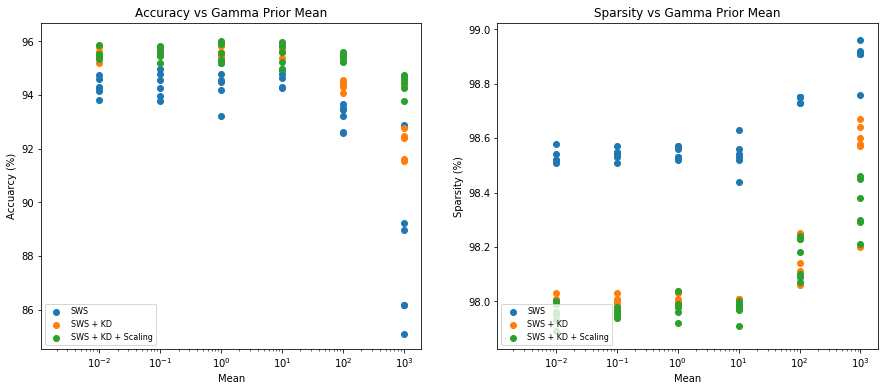

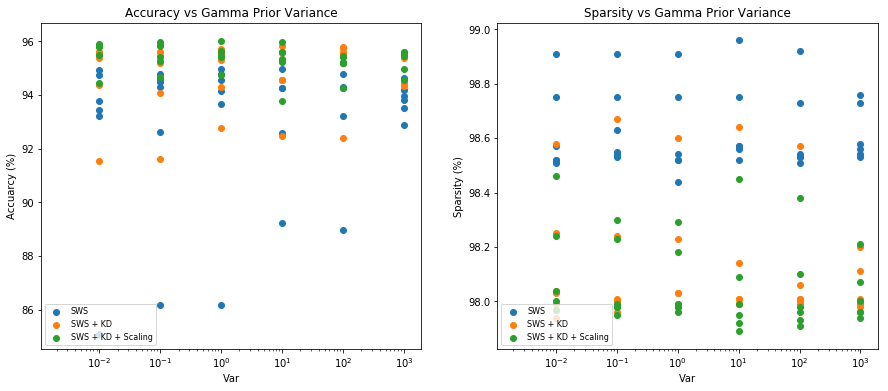

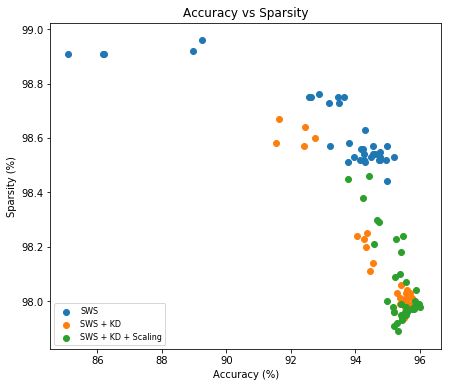

In [15]:
plt.clf()
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sws_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS"]['mean'], mean_var_exp[mean_var_exp['method'] == "SWS"]['acc'])
kd_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS + KD"]['mean'], mean_var_exp[mean_var_exp['method'] == "SWS + KD"]['acc'])
kd_s_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"]['mean'], mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"]['acc'])
ax = plt.gca()
ax.set_xscale('log')
plt.title("Accuracy vs Gamma Prior Mean")
plt.xlabel("Mean")
plt.ylabel("Accuarcy (%)")
plt.legend((sws_scatter, kd_scatter, kd_s_scatter), ('SWS', "SWS + KD", "SWS + KD + Scaling"), scatterpoints=1, loc='lower left', ncol=1, fontsize=8)

plt.subplot(1,2,2)
sws_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS"]['mean'], mean_var_exp[mean_var_exp['method'] == "SWS"]['sp'])
kd_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS + KD"]['mean'], mean_var_exp[mean_var_exp['method'] == "SWS + KD"]['sp'])
kd_s_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"]['mean'], mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"]['sp'])
ax = plt.gca()
ax.set_xscale('log')
plt.title("Sparsity vs Gamma Prior Mean")
plt.xlabel("Mean")
plt.ylabel("Sparsity (%)")
plt.legend((sws_scatter, kd_scatter, kd_s_scatter), ('SWS', "SWS + KD", "SWS + KD + Scaling"), scatterpoints=1, loc='lower left', ncol=1, fontsize=8)
plt.savefig('mean.eps', format='eps', dpi=1000)

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sws_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS"]['var'], mean_var_exp[mean_var_exp['method'] == "SWS"]['acc'])
kd_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS + KD"]['var'], mean_var_exp[mean_var_exp['method'] == "SWS + KD"]['acc'])
kd_s_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"]['var'], mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"]['acc'])
ax = plt.gca()
ax.set_xscale('log')
plt.title("Accuracy vs Gamma Prior Variance")
plt.xlabel("Var")
plt.ylabel("Accuarcy (%)")
plt.legend((sws_scatter, kd_scatter, kd_s_scatter), ('SWS', "SWS + KD", "SWS + KD + Scaling"), scatterpoints=1, loc='lower left', ncol=1, fontsize=8)

plt.subplot(1,2,2)
sws_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS"]['var'], mean_var_exp[mean_var_exp['method'] == "SWS"]['sp'])
kd_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS + KD"]['var'], mean_var_exp[mean_var_exp['method'] == "SWS + KD"]['sp'])
kd_s_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"]['var'], mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"]['sp'])
ax = plt.gca()
ax.set_xscale('log')
plt.title("Sparsity vs Gamma Prior Variance")
plt.xlabel("Var")
plt.ylabel("Sparsity (%)")
plt.legend((sws_scatter, kd_scatter, kd_s_scatter), ('SWS', "SWS + KD", "SWS + KD + Scaling"), scatterpoints=1, loc='lower left', ncol=1, fontsize=8)

plt.figure(figsize=(7, 6))
sws_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS"]['acc'], mean_var_exp[mean_var_exp['method'] == "SWS"]['sp'])
kd_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS + KD"]['acc'], mean_var_exp[mean_var_exp['method'] == "SWS + KD"]['sp'])
kd_s_scatter = plt.scatter(mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"]['acc'], mean_var_exp[mean_var_exp['method'] == "SWS + KD + Scaling"]['sp'])
plt.title("Accuracy vs Sparsity")
plt.xlabel("Accuracy (%)")
plt.ylabel("Sparsity (%)")
plt.legend((sws_scatter, kd_scatter, kd_s_scatter), ('SWS', "SWS + KD", "SWS + KD + Scaling"), scatterpoints=1, loc='lower left', ncol=1, fontsize=8)
plt.savefig('acc_sp.eps', format='eps', dpi=1000)

plt.show()

### Temp vs Tau Experiment

In [7]:
temp_tau_exp = pd.DataFrame(columns = ["temp", "tau", "method", "acc", "sp"])
idx=0

with open("../experiments/temp-tau.txt", "r") as handle:
    data = handle.readlines()
for i, line in enumerate(data):
    if "Temp" in line:
        temp = float(line.split()[1].replace(",",""))
        tau = float(line.split()[3].replace(",",""))
        sws = (float(data[i+1].split()[11].replace(",","")), float(data[i+1].split()[14].replace(",","")))
        kd = (float(data[i+2].split()[11].replace(",","")), float(data[i+2].split()[14].replace(",","")))
        kd_s = (float(data[i+3].split()[11].replace(",","")), float(data[i+3].split()[14].replace(",","")))
        
        temp_tau_exp.loc[idx] = ([temp, tau, "SWS", sws[0], sws[1]])
        idx +=1
        temp_tau_exp.loc[idx] = ([temp, tau, "SWS + KD", kd[0], kd[1]])
        idx +=1
        temp_tau_exp.loc[idx] = ([temp, tau, "SWS + KD + Scaling", kd_s[0], kd_s[1]])
        idx +=1
        
temp_tau_exp = temp_tau_exp.drop_duplicates()

**Temp vs Tau Heatmaps**

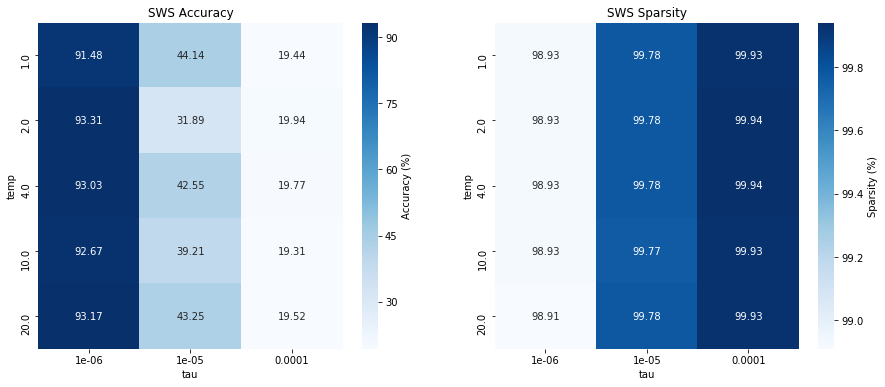

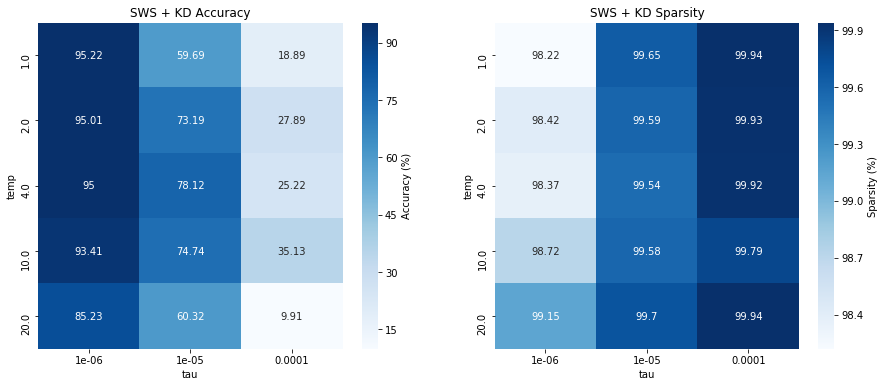

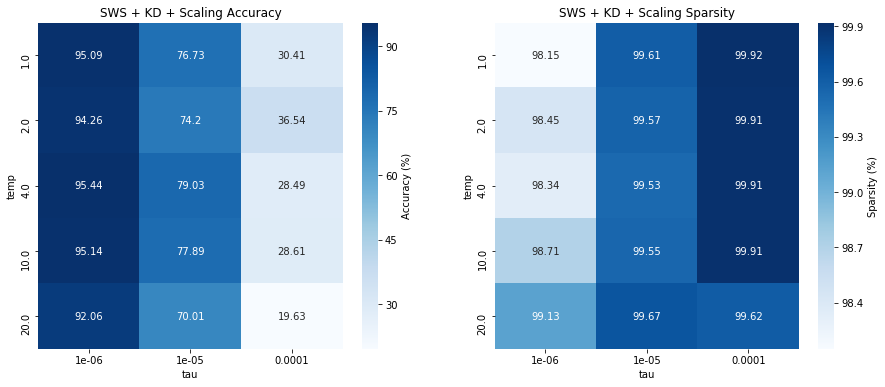

In [10]:
ipd.display(ipd.Markdown("**Temp vs Tau Heatmaps**"))
plt.clf()
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.heatmap(temp_tau_exp[temp_tau_exp['method'] == "SWS"].pivot(index='temp', columns='tau', values='acc'), cmap='Blues', cbar_kws = {'label' : 'Accuracy (%)'}, annot=True, fmt="g")
plt.title("SWS Accuracy")

plt.subplot(1,2,2)
sns.heatmap(temp_tau_exp[temp_tau_exp['method'] == "SWS"].pivot(index='temp', columns='tau', values='sp'), cmap='Blues', cbar_kws = {'label' : 'Sparsity (%)'}, annot=True, fmt="g")
plt.title("SWS Sparsity")

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.heatmap(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"].pivot(index='temp', columns='tau', values='acc'), cmap='Blues', cbar_kws = {'label' : 'Accuracy (%)'}, annot=True, fmt="g")
plt.title("SWS + KD Accuracy")

plt.subplot(1,2,2)
sns.heatmap(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"].pivot(index='temp', columns='tau', values='sp'), cmap='Blues', cbar_kws = {'label' : 'Sparsity (%)'}, annot=True, fmt="g")
plt.title("SWS + KD Sparsity")

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.heatmap(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"].pivot(index='temp', columns='tau', values='acc'), cmap='Blues', cbar_kws = {'label' : 'Accuracy (%)'}, annot=True, fmt="g")
plt.title("SWS + KD + Scaling Accuracy")

plt.subplot(1,2,2)
sns.heatmap(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"].pivot(index='temp', columns='tau', values='sp'), cmap='Blues', cbar_kws = {'label' : 'Sparsity (%)'}, annot=True, fmt="g")
plt.title("SWS + KD + Scaling Sparsity")
plt.savefig('temp.eps', format='eps', dpi=1000)
plt.show()

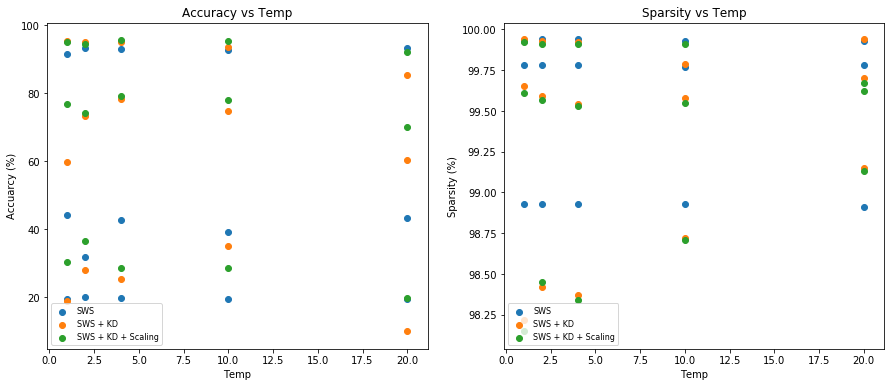

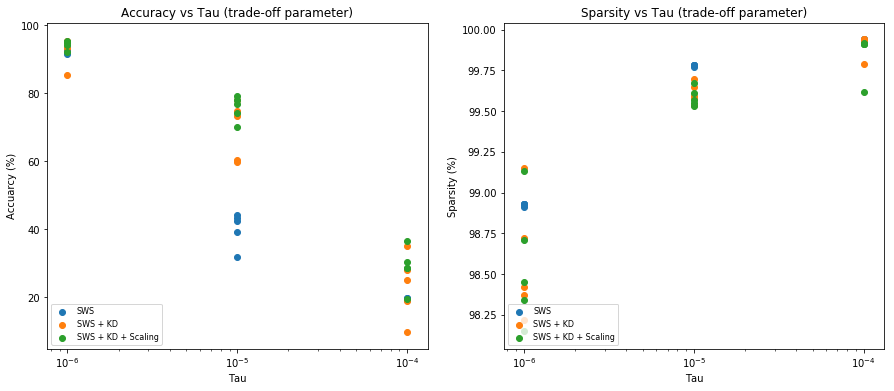

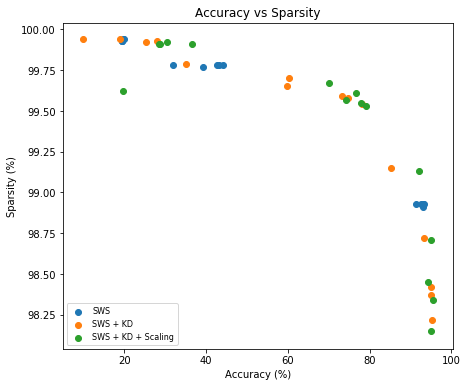

In [9]:
plt.clf()
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sws_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS"]['temp'], temp_tau_exp[temp_tau_exp['method'] == "SWS"]['acc'])
kd_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"]['temp'], temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"]['acc'])
kd_s_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"]['temp'], temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"]['acc'])
plt.title("Accuracy vs Temp")
plt.xlabel("Temp")
plt.ylabel("Accuarcy (%)")
plt.legend((sws_scatter, kd_scatter, kd_s_scatter), ('SWS', "SWS + KD", "SWS + KD + Scaling"), scatterpoints=1, loc='lower left', ncol=1, fontsize=8)

plt.subplot(1,2,2)
sws_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS"]['temp'], temp_tau_exp[temp_tau_exp['method'] == "SWS"]['sp'])
kd_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"]['temp'], temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"]['sp'])
kd_s_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"]['temp'], temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"]['sp'])
plt.title("Sparsity vs Temp")
plt.xlabel("Temp")
plt.ylabel("Sparsity (%)")
plt.legend((sws_scatter, kd_scatter, kd_s_scatter), ('SWS', "SWS + KD", "SWS + KD + Scaling"), scatterpoints=1, loc='lower left', ncol=1, fontsize=8)

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
ax = plt.gca()
ax.set_xscale('log')
sws_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS"]['tau'], temp_tau_exp[temp_tau_exp['method'] == "SWS"]['acc'])
kd_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"]['tau'], temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"]['acc'])
kd_s_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"]['tau'], temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"]['acc'])
plt.title("Accuracy vs Tau (trade-off parameter)")
plt.xlabel("Tau")
plt.ylabel("Accuarcy (%)")
plt.legend((sws_scatter, kd_scatter, kd_s_scatter), ('SWS', "SWS + KD", "SWS + KD + Scaling"), scatterpoints=1, loc='lower left', ncol=1, fontsize=8)

plt.subplot(1,2,2)
ax = plt.gca()
ax.set_xscale('log')
sws_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS"]['tau'], temp_tau_exp[temp_tau_exp['method'] == "SWS"]['sp'])
kd_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"]['tau'], temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"]['sp'])
kd_s_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"]['tau'], temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"]['sp'])
plt.title("Sparsity vs Tau (trade-off parameter)")
plt.xlabel("Tau")
plt.ylabel("Sparsity (%)")
plt.legend((sws_scatter, kd_scatter, kd_s_scatter), ('SWS', "SWS + KD", "SWS + KD + Scaling"), scatterpoints=1, loc='lower left', ncol=1, fontsize=8)

plt.figure(figsize=(7, 6))
sws_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS"]['acc'], temp_tau_exp[temp_tau_exp['method'] == "SWS"]['sp'])
kd_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"]['acc'], temp_tau_exp[temp_tau_exp['method'] == "SWS + KD"]['sp'])
kd_s_scatter = plt.scatter(temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"]['acc'], temp_tau_exp[temp_tau_exp['method'] == "SWS + KD + Scaling"]['sp'])
plt.title("Accuracy vs Sparsity")
plt.xlabel("Accuracy (%)")
plt.ylabel("Sparsity (%)")
plt.legend((sws_scatter, kd_scatter, kd_s_scatter), ('SWS', "SWS + KD", "SWS + KD + Scaling"), scatterpoints=1, loc='lower left', ncol=1, fontsize=8)

plt.show()